In [46]:
import aquamonitor as am
import nivapy3 as nivapy
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib ipympl

In [2]:
# Get access token
token = am.login()

Please enter your credentials.


Username:  ········
Password:  ········


In [3]:
proj_df = am.get_projects(token=token)
print(f"{len(proj_df)} projects in the database.")
proj_df.head()

1467 projects in the database.


,project_id,project_code,project_name,description
0,1,NaN,xxx,NaN
1,55,NaN,PARCOM_Aquateam,NaN
2,56,NaN,PARCOM_NIVA,NaN
3,58,NaN,MAR_BOK,Fagdata
4,59,NaN,MAR_IMA,Fagdata


In [4]:
# Find the project code for the elveovervåkingsprogrammet
proj_df.query("project_name.str.contains('hovedelv')", engine="python")

,project_id,project_code,project_name,description
1300,12564,200310-3,Elveovervåkings hovedelver 2021-25,Etterfølgeren til RID og O-16384-3. Overvåking...
1384,12668,200310.04,Elveovervåkings hovedelver 2021-25 - Prioriter...,Elveovervåkings hovedelver 2021-25 - Prioriter...


In [5]:
# Project of interest
proj_id = 12564

stn_df = am.get_project_stations(proj_id, token=token, return_coords=True)
print(f"{len(stn_df)} stations in project.")
stn_df

22 stations in project.


,project_id,station_id,station_code,station_name,type,longitude,latitude
0,12564,40352,BUSEDRA,Drammenselva,Elv,10.007898,59.752576
1,12564,40353,TELESKI,Skienselva,Elv,9.608040,59.204106
2,12564,40354,VAGEOTR,Otra,Elv,7.958165,58.184772
3,12564,40355,VESENUM,Numedalslågen,Elv,10.070949,59.101283
4,12564,40356,ØSTEGLO,Glomma ved Sarpsfoss,Elv,11.134112,59.279802
5,12564,40357,STREORK,Orkla,Elv,9.770770,63.203108
6,12564,40358,FINEALT,Altaelva,Elv,23.261237,69.930125
7,12564,40360,NOREVEF,Vefsna,Elv,13.226618,65.742456
8,12564,40361,ROGEORR,Orreelva,Elv,5.529975,58.732568
9,12564,40365,STRENID,Nidelva(Tr.heim),Elv,10.387974,63.393651


In [6]:
# Period of interest
st_dt = "01.01.2000"
end_dt = "31.12.2022"

df = am.get_project_chemistry(proj_id, st_dt, end_dt, token=token)
df.head()

,project_id,project_name,station_id,station_code,station_name,sample_date,depth1,depth2,parameter_name,flag,value,unit
0,12564,Elveovervåkings hovedelver 2021-25,40352,BUSEDRA,Drammenselva,2000-01-26 00:00:00+00:00,0.0,0.0,As,NaN,0.10000,µg/l
1,12564,Elveovervåkings hovedelver 2021-25,40352,BUSEDRA,Drammenselva,2000-01-26 00:00:00+00:00,0.0,0.0,Cd,NaN,0.00900,µg/l
2,12564,Elveovervåkings hovedelver 2021-25,40352,BUSEDRA,Drammenselva,2000-01-26 00:00:00+00:00,0.0,0.0,Cr,<,0.01000,µg/l
3,12564,Elveovervåkings hovedelver 2021-25,40352,BUSEDRA,Drammenselva,2000-01-26 00:00:00+00:00,0.0,0.0,Cu,NaN,0.00089,mg/l
4,12564,Elveovervåkings hovedelver 2021-25,40352,BUSEDRA,Drammenselva,2000-01-26 00:00:00+00:00,0.0,0.0,Konduktivitet,NaN,3.70000,mS/m


In [59]:
site = "TROEMÅL2"
cols_to_keep = ['sample_date', 'parameter_name', 'value', 'unit']
site_df_long = df.loc[df['station_code'] == site, cols_to_keep]
site_df_long

,sample_date,parameter_name,value,unit
288267,2018-02-12 14:00:00+00:00,Ca,8.840000,mg/L
288268,2018-02-12 14:00:00+00:00,DOC,0.900000,mg/L C
288269,2018-02-12 14:00:00+00:00,Konduktivitet,6.890000,mS/m
288270,2018-02-12 14:00:00+00:00,NH4-N,13.000000,µg/l
288271,2018-02-12 14:00:00+00:00,NO3-N,72.000000,µg/l
...,...,...,...,...
290073,2022-12-05 09:30:00+00:00,UV-Abs. 254nm,0.027240,Abs/cm
290074,2022-12-05 09:30:00+00:00,UV-Abs. 285nm,0.018894,Abs/cm
290075,2022-12-05 09:30:00+00:00,UV-Abs. 365nm,0.004976,Abs/cm
290076,2022-12-05 09:30:00+00:00,UV-Abs. 410nm,0.002148,Abs/cm


In [60]:
site_df.columns

Index(['Ca', 'Cl', 'DOC', 'Farge', 'Hg', 'K', 'Konduktivitet', 'Mg', 'NH4-N',
       'NO3+NO2-N', 'NO3-N', 'Na', 'Nitrogen part', 'PO4-P', 'POC', 'SO4',
       'STS', 'Si', 'SiO2', 'TOC', 'TOTN', 'TOTN_F', 'TOTP', 'TOTP/F',
       'TOTP_P', 'TSM', 'Temperatur', 'Turbiditet', 'UV-Abs. 254nm',
       'UV-Abs. 285nm', 'UV-Abs. 365nm', 'UV-Abs. 410nm', 'pH'],
      dtype='object', name='parameter_name')

In [61]:
vars_to_keep = [
    "Ca",
    "Cl",
    "DOC",
    "K",
    "Konduktivitet",
    "Mg",
    "NH4-N",
    "NO3+NO2-N",
    "NO3-N",
    "Na",
    "Nitrogen part",
    "PO4-P",
    "POC",
    "SO4",
    "Si",
    "SiO2",
    "TOC",
    "TOTN",
    "TOTP",
    "TOTP/F",
    "TOTP_P",
    "TSM",
    "Temperatur",
    "Turbiditet",
    "UV-Abs. 254nm",
    "UV-Abs. 285nm",
    "UV-Abs. 365nm",
    "UV-Abs. 410nm",
    "pH",
]

In [78]:
# Create a separate series for units
unit_series = site_df_long.drop_duplicates(['parameter_name', 'unit']).set_index('parameter_name')['unit']
unit_series = unit_series[vars_to_keep]

unit_series.to_csv(r'../data/water_chem/water_chem_units.csv')

print(unit_series)

parameter_name
Ca                 mg/L
Cl                 mg/L
DOC              mg/L C
DOC                mg/l
K                  mg/L
Konduktivitet      mS/m
Mg                 mg/L
NH4-N              µg/l
NO3+NO2-N          µg/l
NO3-N              µg/l
Na                 mg/L
Nitrogen part    µg/l N
PO4-P              µg/l
POC              µg/l C
SO4                mg/L
Si                 mg/l
SiO2               mg/l
TOC                mg/l
TOTN               µg/l
TOTP               µg/l
TOTP/F           µg/l P
TOTP_P           µg/l P
TSM                mg/l
Temperatur            C
Turbiditet          FNU
UV-Abs. 254nm    Abs/cm
UV-Abs. 285nm    Abs/cm
UV-Abs. 365nm    Abs/cm
UV-Abs. 410nm    Abs/cm
pH                  NaN
Name: unit, dtype: object


In [80]:
site_df = site_df_long.pivot(index='sample_date', columns='parameter_name', values='value')
site_df = site_df.loc[:, vars_to_keep]
site_df

parameter_name,Ca,Cl,DOC,K,Konduktivitet,Mg,NH4-N,NO3+NO2-N,NO3-N,Na,...,TOTP/F,TOTP_P,TSM,Temperatur,Turbiditet,UV-Abs. 254nm,UV-Abs. 285nm,UV-Abs. 365nm,UV-Abs. 410nm,pH
sample_date,,,,,,,,,,,,,,,,,,,,,
2018-02-12 14:00:00+00:00,8.84,NaN,0.90,NaN,6.89,NaN,13.0,NaN,72.0,NaN,...,1.0,NaN,0.79,0.1,0.34,0.032734,0.022252,0.005926,0.002694,7.36
2018-03-05 13:30:00+00:00,7.81,NaN,1.10,NaN,6.35,NaN,3.0,NaN,60.0,NaN,...,1.0,NaN,1.39,NaN,0.91,0.032090,0.020780,0.005140,0.002238,7.50
2018-04-03 15:50:00+00:00,7.86,NaN,0.98,NaN,6.10,NaN,7.0,NaN,66.0,NaN,...,1.0,NaN,0.90,-0.1,0.48,0.029324,0.019426,0.004780,0.002078,7.50
2018-05-07 10:15:00+00:00,8.19,NaN,3.50,NaN,6.41,NaN,2.0,NaN,45.0,NaN,...,3.0,NaN,19.40,NaN,12.00,0.145308,0.105744,0.033852,0.016550,7.43
2018-06-04 00:00:00+00:00,8.92,NaN,1.00,NaN,6.58,NaN,2.0,NaN,30.0,NaN,...,3.0,NaN,5.83,NaN,1.80,0.040966,0.028174,0.008678,0.004402,7.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01 07:30:00+00:00,9.16,1.36,1.10,0.70,6.89,1.53,2.0,NaN,19.0,1.28,...,NaN,3.0,1.23,12.5,0.66,0.036104,0.025428,0.007068,0.003114,7.63
2022-09-05 08:00:00+00:00,9.66,1.20,0.92,0.75,7.20,1.61,25.0,NaN,18.0,1.39,...,NaN,2.0,1.15,8.0,0.40,0.031250,0.021636,0.005804,0.002744,7.69
2022-10-03 08:00:00+00:00,9.08,1.52,0.87,0.73,7.12,1.66,2.0,NaN,28.0,1.37,...,NaN,2.0,1.08,3.9,0.56,0.027486,0.018772,0.004940,0.002280,7.62


In [81]:
# Some unit conversions
site_df['POC'] = site_df['POC'] / 1000
unit_series['POC'] = 'mg/l'

# Fill any NaNs in NO3 with NO2+NO3 then drop NOx col
site_df['NO3-N'].fillna(site_df['NO3+NO2-N'], inplace=True)
site_df.drop('NO3+NO2-N', axis=1, inplace=True)

In [82]:
site_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parameter_name,,,,,,,,
Ca,58.0,9.814138,1.382563,6.740000,8.855000,9.605000,10.800000,13.400000
Cl,23.0,2.442609,1.628226,0.970000,1.565000,1.960000,2.460000,8.830000
DOC,64.0,1.543750,0.996929,0.620000,0.987500,1.100000,1.600000,4.900000
K,23.0,0.879565,0.293435,0.620000,0.740000,0.790000,0.930000,2.040000
Konduktivitet,58.0,7.623103,0.958140,5.180000,6.977500,7.635000,8.280000,9.630000
Mg,23.0,1.712174,0.266372,1.110000,1.630000,1.760000,1.855000,2.210000
NH4-N,64.0,13.546875,24.769368,2.000000,2.000000,5.000000,12.250000,170.000000
NO3-N,64.0,62.062500,39.066843,14.000000,32.250000,61.500000,74.750000,240.000000
Na,23.0,1.738696,0.669459,0.940000,1.380000,1.620000,1.845000,4.210000


In [84]:
# For plotting and guessing what the fractions are

p_species = ["PO4-P", "TOTP", "TOTP/F", "TOTP_P"]

n_species = [
    "NH4-N",
    # "NO3+NO2-N",
    "NO3-N",
    "Nitrogen part",
    "TOTN",
]

c_species = [
    "DOC",
    "POC",
    "TOC"
]

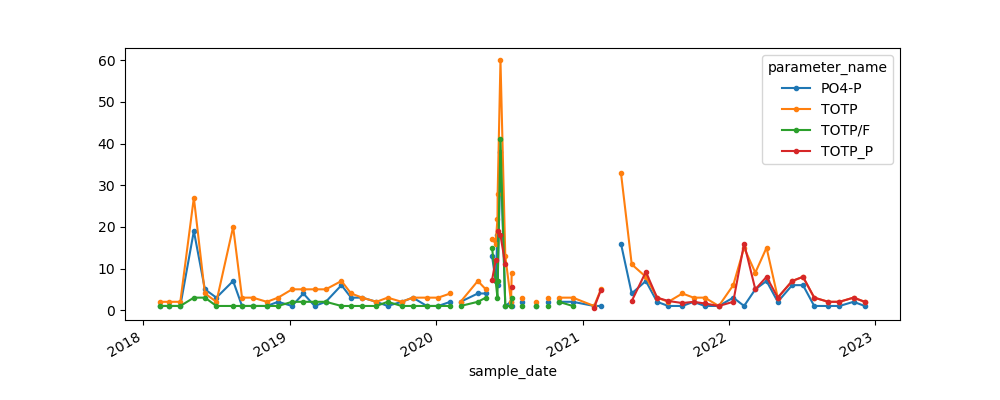

In [66]:
site_df[p_species].plot(subplots=False, sharex=True, marker="o", ms=3, figsize=(10, 4));

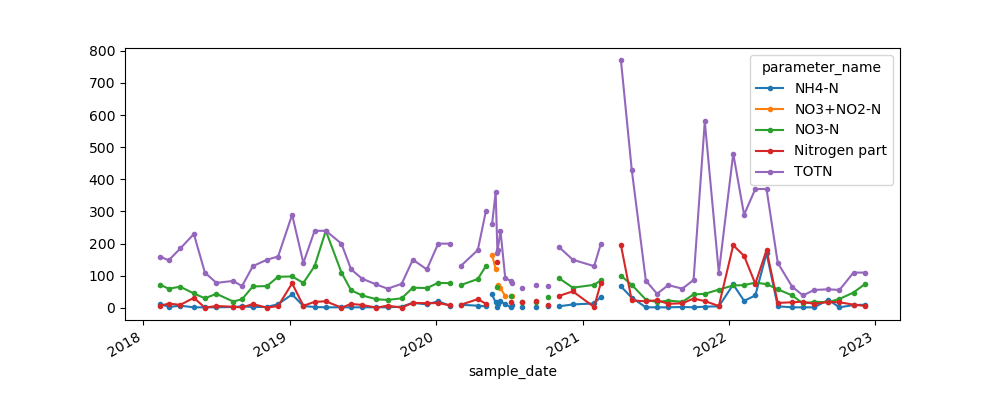

In [67]:
plt.close()
site_df[n_species].plot(subplots=False, sharex=True, marker="o", ms=3, figsize=(10, 4));

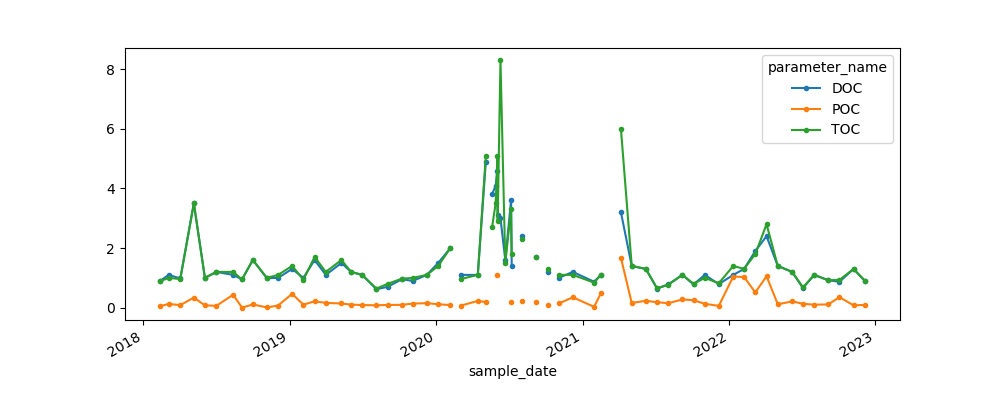

In [69]:
plt.close()
site_df[c_species].plot(subplots=False, sharex=True, marker="o", ms=3, figsize=(10, 4));

In [90]:
# Guessing what the P species are. CHECK!!!!!!!!!!!!!!
# Does PO4-P change from being TRP to SRP from 2021??
rename_dict = {'PO4-P': 'TRP', 'TOTP': 'TP', 'TOTP/F':'TDP', 'TOTP_P': 'PP', 'TSM': 'SPM',
               'TOTN_F': 'TDN', 'Nitrogen part': 'N_Part'}

site_df.rename(columns=rename_dict, inplace=True)
site_df.to_csv(r'../data/water_chem/malselva_am-export_2018-2022.csv')

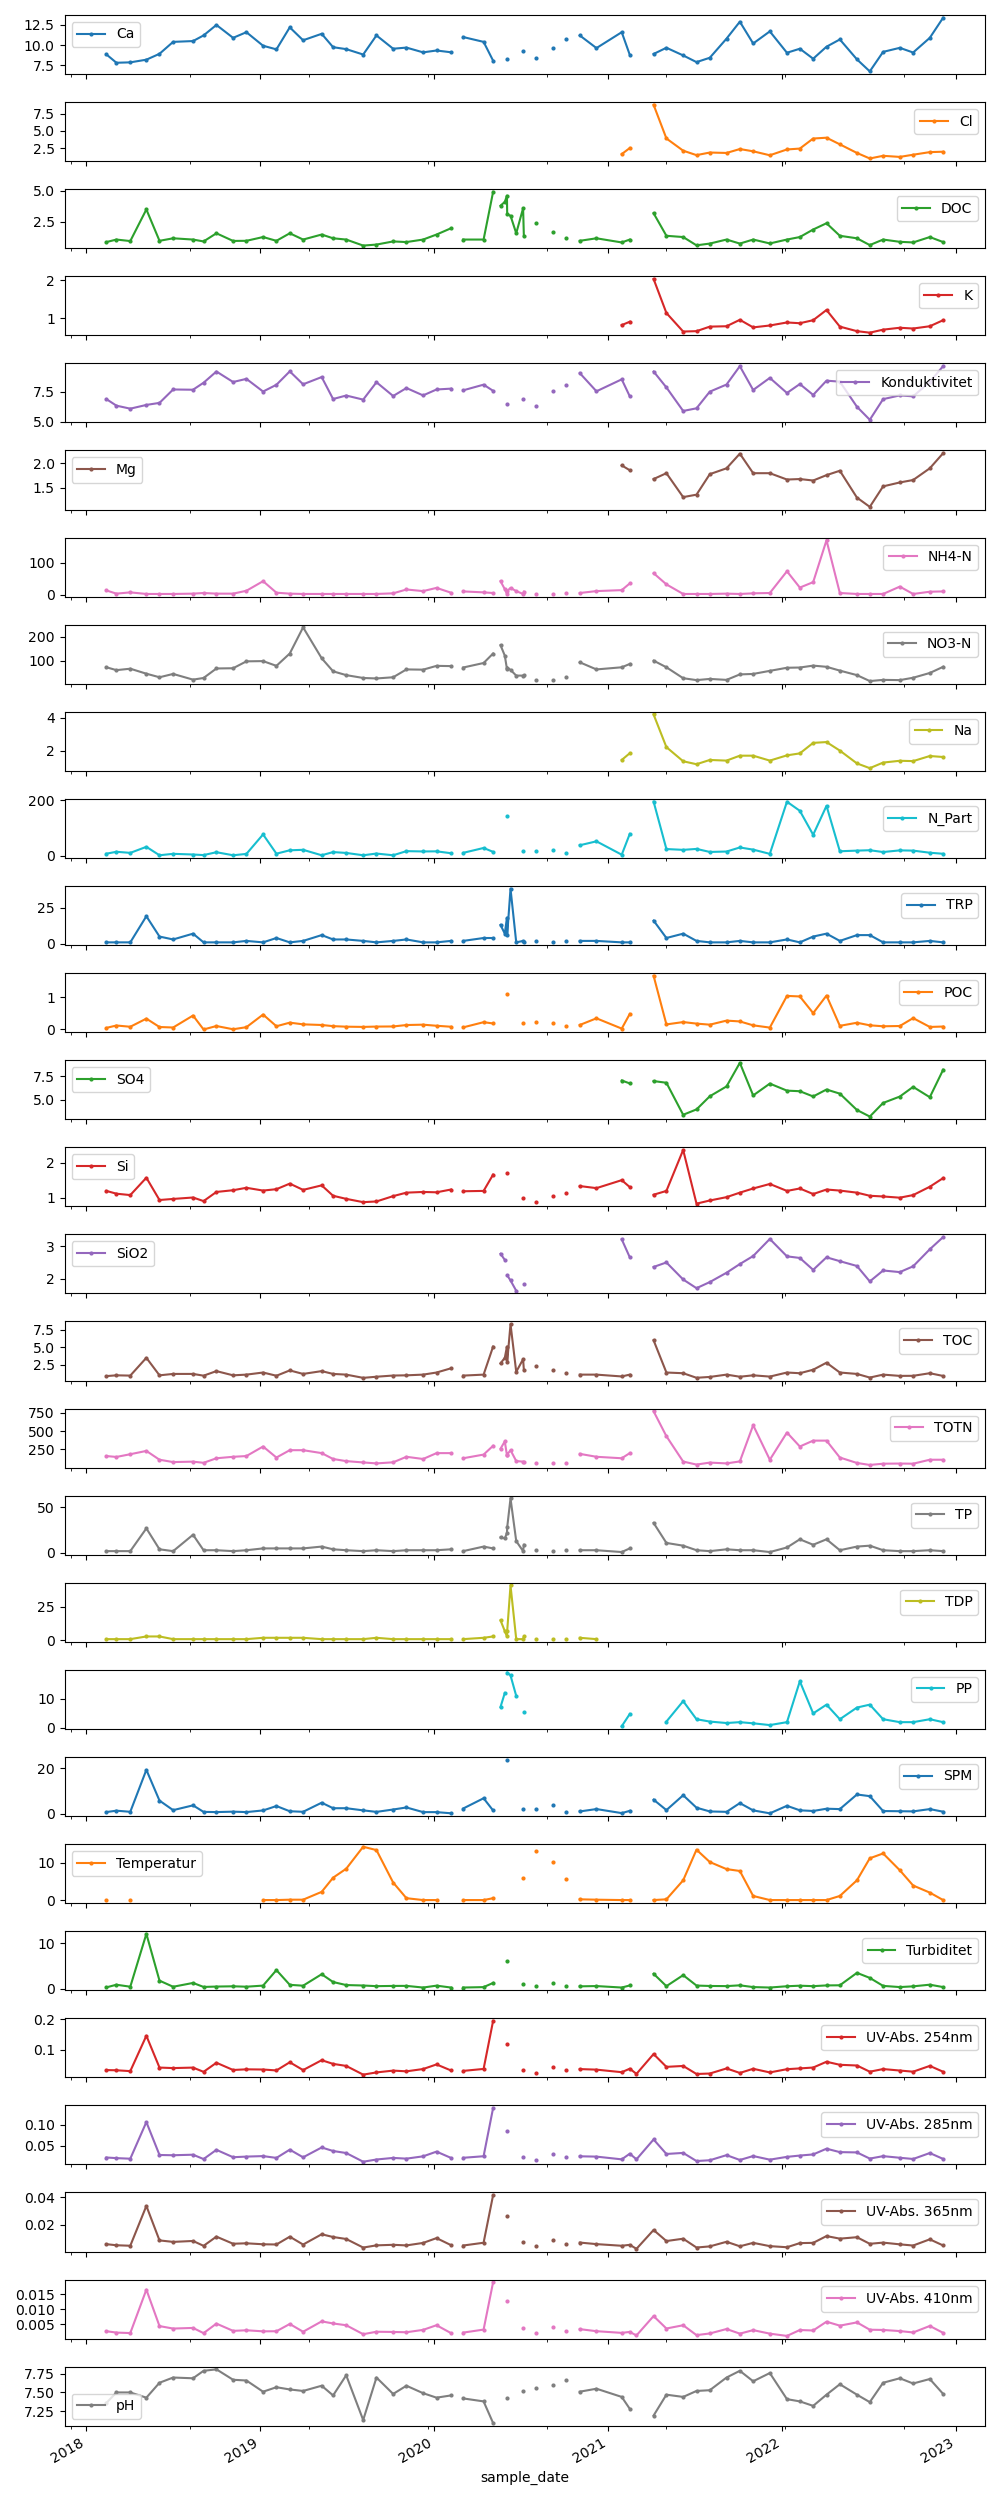

In [89]:
plt.close('all')
site_df.plot(subplots=True, sharex=True, figsize=(10, 25), marker='o', ms=2);
plt.tight_layout()